In [1]:
import time
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import tushare as ts
ts.set_token('993df56f2f58d7cf01eb581421e762de4c45172b9979ae950bc1333a')

pro = ts.pro_api()

import mpl_finance as mpf
# import matplotlib.finance as mpf
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.pylab import date2num
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
sns.set()
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'SimHei'

D:\Users\admin\Anaconda3\envs\py37-stock\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
from mylab.mystock import plot_K_df
from mylab.mystock import plot_K_code
from mylab.mystock import plot_K
from mylab.mystock import plot_vol
from mylab.mystock import plot_macd
from mylab.mystock import extract_feature
from mylab.mystock import select_stock1
from mylab.mystock import select_stock2
from mylab.mystock import display_select
from mylab.mystock import get_macd
LOCAL = not True

In [3]:
stock_code = "000001.SZ"
start_date = "20191202"
end_date = "20200310"

if LOCAL:
    pool_df = pd.read_csv("./data/stock_basic_info.csv")
else:
    pool_df = pro.stock_basic()

if LOCAL:
    for file_dir , _ , files in os.walk("./data/daily/"):
        for i,file_name in enumerate(files):
            if file_name[:9] == stock_code:
                daily_df = pd.read_csv(file_dir+file_name)
                daily_df["trade_date"] = daily_df["trade_date"].astype("str")
                break
else:
    daily_df = pro.daily(ts_code = stock_code,start_date = start_date, end_date = end_date )
print(len(daily_df))
# add some ancillary column 
daily_df["trade_date_stamp"] = daily_df["trade_date"].copy()
daily_df["trade_date_stamp"] = pd.to_datetime(daily_df["trade_date_stamp"]).map(date2num)
daily_df.sort_values(by="trade_date_stamp", ascending=True,inplace=True)
daily_df.reset_index(inplace = True)
daily_df.drop("index", axis = 1,inplace = True)
print(daily_df.shape)
daily_df.tail()

65
(65, 12)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,trade_date_stamp
60,000001.SZ,20200304,14.68,14.78,14.51,14.69,14.72,-0.03,-0.2038,862595.23,1261123.063,737488.0
61,000001.SZ,20200305,14.80,15.64,14.73,15.39,14.69,0.70,4.7651,2686602.34,4089493.523,737489.0
62,000001.SZ,20200306,15.18,15.27,15.02,15.03,15.39,-0.36,-2.3392,1228531.03,1858691.259,737490.0
63,000001.SZ,20200309,14.71,14.73,14.42,14.45,15.03,-0.58,-3.8589,1665793.54,2420392.130,737493.0
64,000001.SZ,20200310,14.38,14.85,14.38,14.76,14.45,0.31,2.1453,1167864.97,1709084.565,737494.0


In [4]:
daily_df = extract_feature(daily_df)
print(daily_df.shape)
daily_df.tail()

(65, 79)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,vol_pre5_min,vol_pre5_amp,close_pre5_mean,close_pre5_std,close_pre5_max,close_pre5_min,change_pre5_mean,change_pre5_std,change_pre5_max,change_pre5_min
60,000001.SZ,20200304,14.68,14.78,14.51,14.69,14.72,-0.03,-0.2038,862595.23,...,0.852110,0.284284,14.822,0.237844,15.11,14.50,-0.40846,2.260491,2.0000,-4.0371
61,000001.SZ,20200305,14.80,15.64,14.73,15.39,14.69,0.70,4.7651,2686602.34,...,0.797418,0.404951,14.762,0.222194,15.11,14.50,-0.38274,2.262304,2.0000,-4.0371
62,000001.SZ,20200306,15.18,15.27,15.02,15.03,15.39,-0.36,-2.3392,1228531.03,...,0.605754,1.280903,14.818,0.337298,15.39,14.50,0.41018,3.256864,4.7651,-4.0371
63,000001.SZ,20200309,14.71,14.73,14.42,14.45,15.03,-0.58,-3.8589,1665793.54,...,0.611953,1.294009,14.924,0.292711,15.39,14.69,0.74976,2.721805,4.7651,-2.3392
64,000001.SZ,20200310,14.38,14.85,14.38,14.76,14.45,0.31,2.1453,1167864.97,...,0.567713,1.200462,14.856,0.362740,15.39,14.45,-0.42202,3.257460,4.7651,-3.8589


0

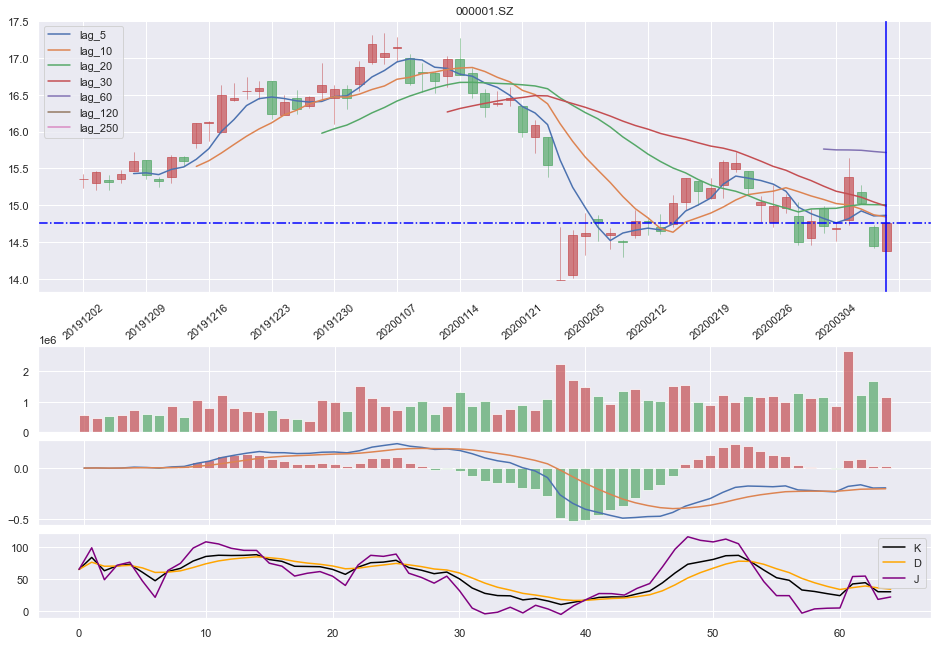

In [5]:
plot_K_df(daily_df)

In [6]:
select_df = select_stock2(daily_df)
print(select_df.shape)
select_df.tail()

(0, 82)


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,...,close_pre5_std,close_pre5_max,close_pre5_min,change_pre5_mean,change_pre5_std,change_pre5_max,change_pre5_min,trade_date2,dates,up


In [7]:
for i in range(len(select_df)):
    ix = select_df.index[i]
    trade_date = select_df.trade_date.values[i]
    print(ix)
    print(trade_date)
    display_select(daily_df,ix, trade_date= trade_date )
    # plt.close()

深华发A 000020.SZ (1, 79)


KeyboardInterrupt: 

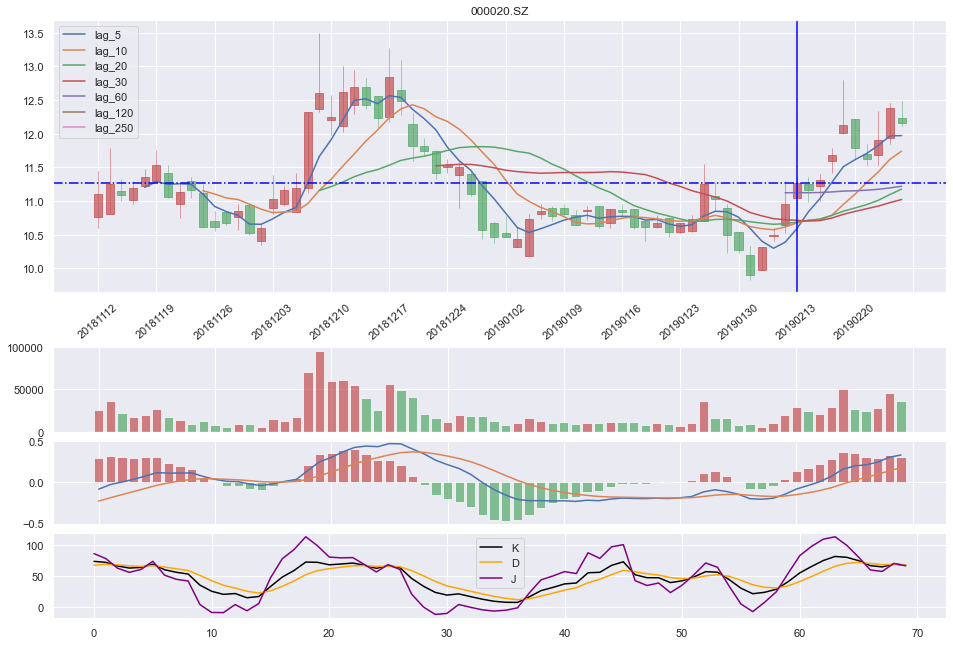

In [8]:
# stock_code = "600667.SH"
start_date = "2016022"
end_date = "20200310"
if LOCAL:
    pool_df = pd.read_csv("./data/stock_basic_info.csv")
else:
    pool_df = pro.stock_basic()

num_stock = len(pool_df)


for i in range(300):
    stock_code = pool_df.loc[i,"ts_code"]
    stock_name = pool_df.loc[i,"name"]
    if stock_code[0] == "3":
        continue
    if stock_name[0] == "*":
        continue
    if LOCAL:
        for file_dir , _ , files in os.walk("./data/daily/"):
            for i,file_name in enumerate(files):
                if file_name[:9] == stock_code:
                    daily_df = pd.read_csv(file_dir+file_name)
                    daily_df["trade_date"] = daily_df["trade_date"].astype("str")
                    break
    else:
        daily_df = pro.daily(ts_code = stock_code,start_date = start_date, end_date = end_date )
    # add some ancillary column 
    daily_df["trade_date_stamp"] = daily_df["trade_date"].copy()
    daily_df["trade_date_stamp"] = pd.to_datetime(daily_df["trade_date_stamp"]).map(date2num)
    daily_df.sort_values(by="trade_date_stamp", ascending=True,inplace=True)
    daily_df.reset_index(inplace = True)
    daily_df.drop("index", axis = 1,inplace = True)
    # features
    daily_df = extract_feature(daily_df)
    # select
#     select_df = select_stock1(daily_df)
    select_df = select_stock2(daily_df)
    if len(select_df) > 0:
        print(stock_name,stock_code,select_df.shape)
    for i in range(len(select_df)):
        ix = select_df.index[i]
        trade_date = select_df.trade_date.values[i]
        # print(ix)
        # print(trade_date)
        display_df = display_select(daily_df,ix, trade_date= trade_date )
        plt.close()